In [1]:
from models.unet import Unet
from models.diffusion_model import DiffusionModel, DiffusionModelExtended, DiffusionModelTest
#from diffusion_model_improved import TargetDiffusion, LearnedVarDiffusion
import torch
from utils.trainer_utils import Trainer
import numpy as np
from utils.data_utils import save_config_to_yaml
from utils.model_utils import linear_beta_schedule
import torch.nn.functional as F


In [2]:
num_classes = len(np.arange(0, 10))
unet_model = Unet(dim=64, channels=1, dim_mults=[1, 2], resnet_block_groups=8, num_classes=None, learned_sinusoidal_dim=16, use_sinposemb=False) 
lr = 0.5e-4
optimizer = torch.optim.Adam(unet_model.parameters(), lr=lr)
optimizer_config = {'optimizer': 'Adam', 
                    'lr': lr}

diffusion_model = DiffusionModel(model=unet_model, image_size=32, in_channels=1, timesteps=1000, beta_schedule='linear')



self.out_dim 1
dims [64, 64, 128]
final 64 1 Conv2d(64, 1, kernel_size=(1, 1), stride=(1, 1))


Epoch: 1


Training Loop: 100%|██████████| 938/938 [2:20:06<00:00,  8.96s/it]  


Epoch 1 Loss: 0.021863913163542747
Epoch: 2


Training Loop: 100%|██████████| 938/938 [2:36:39<00:00, 10.02s/it]  


Epoch 2 Loss: 0.02256689965724945
DDPM Sample


Sampling Time Step:: 1000it [14:42,  1.13it/s]


DDPM Sample


Sampling Time Step:: 1000it [15:10,  1.10it/s]


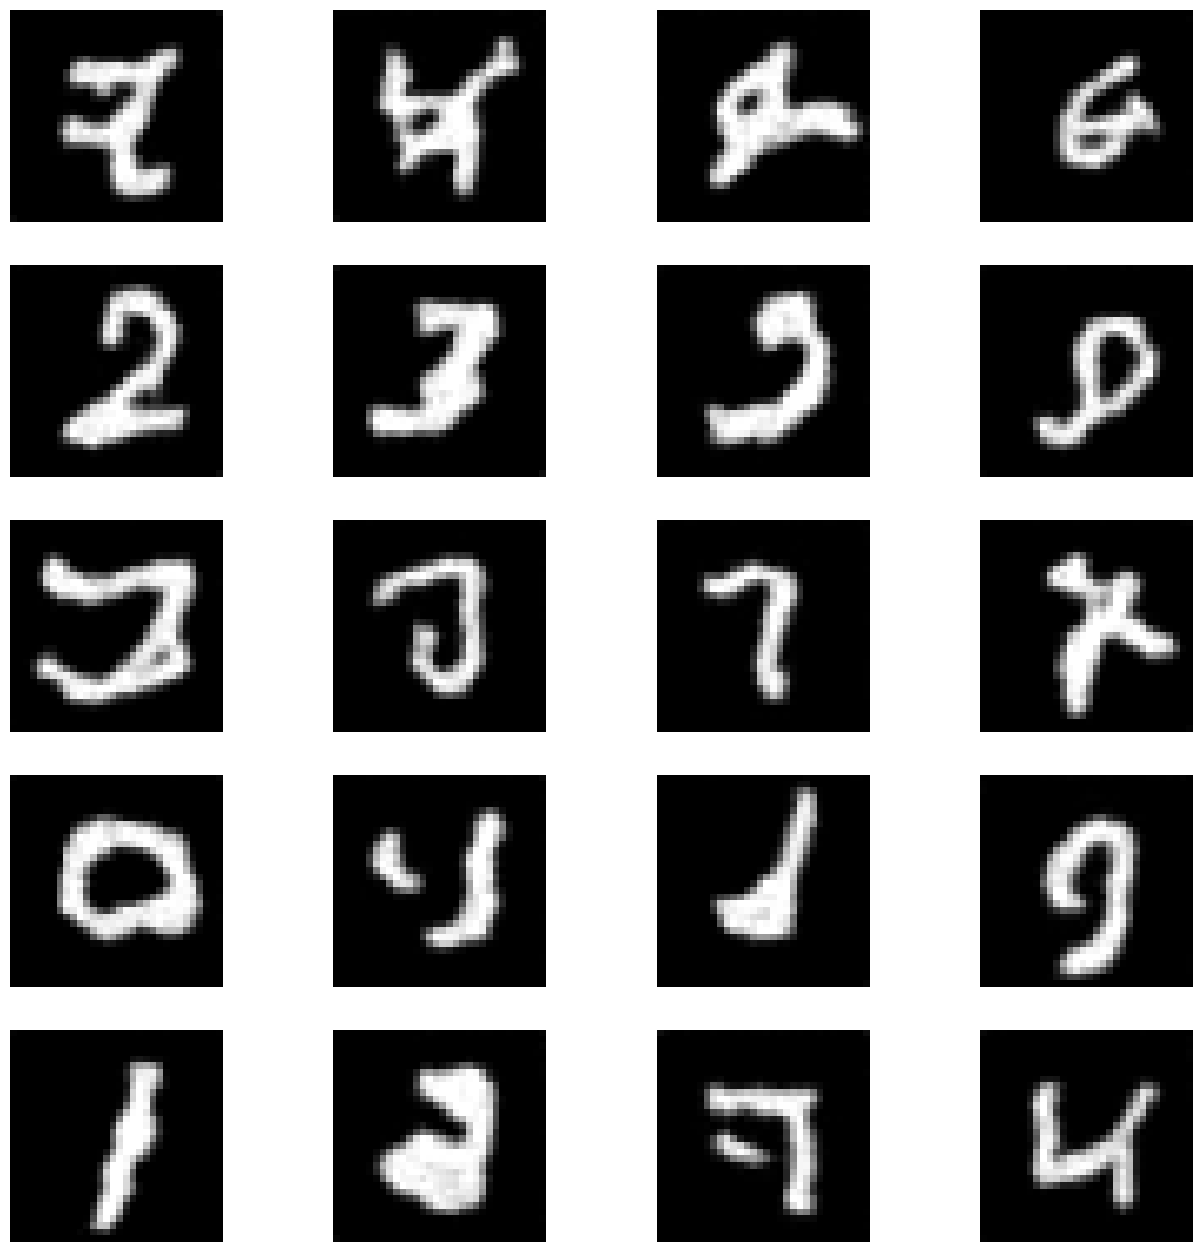

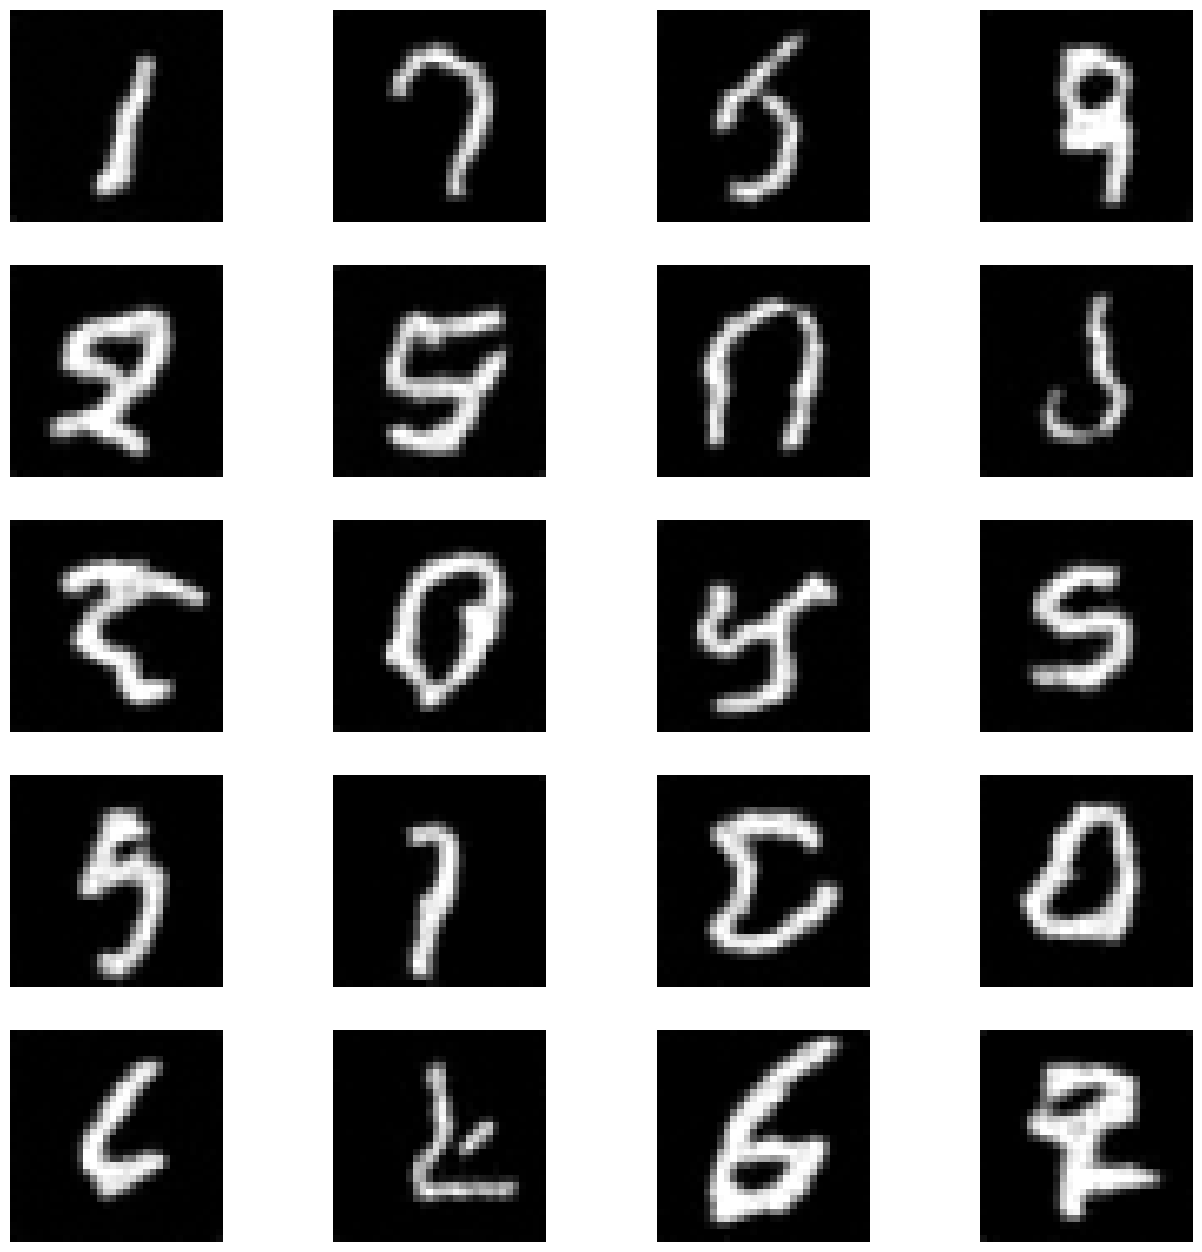

In [3]:
trainer = Trainer(diffusion_model=diffusion_model, optimizer=optimizer, use_ema=True, use_cfg=False, nb_epochs=2, batch_size=64, device='cpu')
save_config_to_yaml(filename='configs/config.yaml',
    data={'dataset': 'MNIST',
          'batch_size': 64,
          'image_size': 32,
          'use_augmentation': False},
    model=unet_model.config,
    diffusion=diffusion_model.config,
    trainer=trainer.config,
    optimizer=optimizer_config)

trainer.train_loop()



In [ ]:
trainer.sampling()